In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [52]:
df = pd.read_csv('./dataset/brca_metabric_clinical_data.tsv', sep='\t')
df.to_csv('./dataset/brca.csv')
df.drop(columns=['Study ID', 'Patient ID', 'Sample ID'], inplace=True)

In [53]:
df.dropna(inplace=True)

X = df.iloc[:, :-2]
y = df.iloc[:, -2]

X = pd.get_dummies(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [62]:
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

X = pd.DataFrame(X_selected, columns=selected_feature_names)

In [63]:
print(selected_feature_names)

Index([0, 1, 2, 3, 4], dtype='int64')


In [59]:
# Create the individual classifiers
svm_clf = SVC()
rf_clf = RandomForestClassifier()
xgb_clf = xgb.XGBClassifier()

# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_clf), ('rf', rf_clf), ('xgb', xgb_clf)], voting='hard')

# Perform 10-fold cross-validation
scores = cross_val_score(voting_clf, X_selected, y, cv=10)

# Get the best accuracy from the cross-validation scores
best_accuracy = max(scores)

best_accuracy

/Users/kasra/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 7 members, which is less than n_splits=10.



0.926605504587156

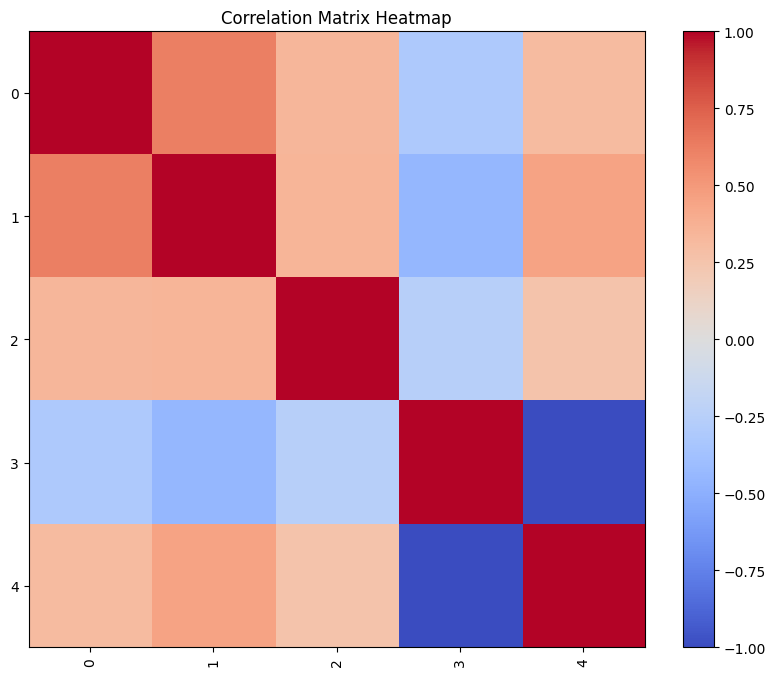

In [60]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [61]:
correlation_matrix = X.corr()
correlation_ranking = correlation_matrix.unstack().sort_values(ascending=False)
correlation_ranking = correlation_ranking[correlation_ranking.index.get_level_values(0) != correlation_ranking.index.get_level_values(1)]
print(correlation_ranking)


1  0    0.618333
0  1    0.618333
4  1    0.451779
1  4    0.451779
   2    0.350406
2  1    0.350406
   0    0.337898
0  2    0.337898
4  0    0.310180
0  4    0.310180
4  2    0.250519
2  4    0.250519
3  2   -0.250519
2  3   -0.250519
3  0   -0.310180
0  3   -0.310180
3  1   -0.451779
1  3   -0.451779
3  4   -1.000000
4  3   -1.000000
dtype: float64
